# Este trabalho tem o objetivo de criar um modelo capaz de prever o risco de queimada em diversas regiões da América do Sul

In [80]:
# Importando bibliotecas básicas para a análise dos dados
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [81]:
# Carregando os dados
arquivo = "focos_de_queimadas.csv"
df = pd.read_csv(arquivo)
df.head()

,DataHora,Satelite,Pais,Estado,Municipio,Bioma,DiaSemChuva,Precipitacao,RiscoFogo,Latitude,Longitude,FRP
0,2024/06/20 00:06:22,GOES-16,Bolivia,El Beni,Yacuma,NaN,7.0,0.0,1.00,-13.1615,-65.3664,47.1
1,2024/06/20 00:06:28,GOES-16,Bolivia,El Beni,Vaca Díez,NaN,0.0,0.0,1.00,-14.1005,-64.3052,69.7
2,2024/06/20 00:06:28,GOES-16,Bolivia,El Beni,Vaca Díez,NaN,0.0,0.0,0.88,-14.1194,-64.3234,117.3
3,2024/06/20 00:06:28,GOES-16,Bolivia,El Beni,Vaca Díez,NaN,0.0,0.0,0.90,-14.1196,-64.3042,200.6
4,2024/06/20 00:06:28,GOES-16,Bolivia,El Beni,Vaca Díez,NaN,0.0,0.0,0.63,-14.1197,-64.2849,50.8


In [82]:
# Analise geral dos dados
print(df.info())
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30466 entries, 0 to 30465
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   DataHora      30466 non-null  object 
 1   Satelite      30466 non-null  object 
 2   Pais          30466 non-null  object 
 3   Estado        30466 non-null  object 
 4   Municipio     30466 non-null  object 
 5   Bioma         19355 non-null  object 
 6   DiaSemChuva   22010 non-null  float64
 7   Precipitacao  22010 non-null  float64
 8   RiscoFogo     22010 non-null  float64
 9   Latitude      30466 non-null  float64
 10  Longitude     30466 non-null  float64
 11  FRP           29133 non-null  float64
dtypes: float64(6), object(6)
memory usage: 2.8+ MB
None


,DiaSemChuva,Precipitacao,RiscoFogo,Latitude,Longitude,FRP
count,22010.000000,22010.000000,22010.000000,30466.000000,30466.000000,29133.000000
mean,31.499682,0.088930,-23.636554,-14.806802,-55.593796,35.247094
std,76.428724,0.910355,154.541505,5.397463,6.541416,51.503120
min,-999.000000,0.000000,-999.000000,-52.735730,-91.491400,0.100000
25%,24.000000,0.000000,0.770000,-18.507198,-60.387300,3.000000
50%,37.000000,0.000000,0.980000,-15.967195,-57.406450,9.300000
75%,52.000000,0.000000,1.000000,-11.500487,-49.553625,60.300000
max,85.000000,31.490000,1.000000,11.316290,-34.979050,817.300000


In [83]:
# Com uma análise rápida, nota-se que o valor -999.000000 está presente no Dataset em DiaSemChuva e em RiscoFogo, o que é estranho
# Além disso, algumas colunas possuem dados nulos
# Portanto farei uma análise mais profunda em cima disso

In [84]:
total_DiaSemChuva = 0
for valor in df['DiaSemChuva']:
    if valor == -999:
        total_DiaSemChuva += 1

total_RiscoFogo = 0
for valor in df['RiscoFogo']:
    if valor == -999:
        total_RiscoFogo += 1

print(f'Total de vezes que -999.0 aparece em DiaSemChuva:  {total_DiaSemChuva}')
print(f'Total de vezes que -999.0 aparece em RiscoFogo:    {total_RiscoFogo}')

Total de vezes que -999.0 aparece em DiaSemChuva:  114
Total de vezes que -999.0 aparece em RiscoFogo:    539


In [85]:
# Substituirei estes valores por NaN para saber qual é o real mínimo
df.replace(-999, np.nan, inplace=True)
print(df.info())
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30466 entries, 0 to 30465
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   DataHora      30466 non-null  object 
 1   Satelite      30466 non-null  object 
 2   Pais          30466 non-null  object 
 3   Estado        30466 non-null  object 
 4   Municipio     30466 non-null  object 
 5   Bioma         19355 non-null  object 
 6   DiaSemChuva   21896 non-null  float64
 7   Precipitacao  22010 non-null  float64
 8   RiscoFogo     21471 non-null  float64
 9   Latitude      30466 non-null  float64
 10  Longitude     30466 non-null  float64
 11  FRP           29133 non-null  float64
dtypes: float64(6), object(6)
memory usage: 2.8+ MB
None


,DiaSemChuva,Precipitacao,RiscoFogo,Latitude,Longitude,FRP
count,21896.000000,22010.000000,21471.000000,30466.000000,30466.000000,29133.000000
mean,36.864907,0.088930,0.848607,-14.806802,-55.593796,35.247094
std,17.716148,0.910355,0.248708,5.397463,6.541416,51.503120
min,0.000000,0.000000,0.000000,-52.735730,-91.491400,0.100000
25%,24.000000,0.000000,0.800000,-18.507198,-60.387300,3.000000
50%,37.000000,0.000000,0.980000,-15.967195,-57.406450,9.300000
75%,52.000000,0.000000,1.000000,-11.500487,-49.553625,60.300000
max,85.000000,31.490000,1.000000,11.316290,-34.979050,817.300000


In [86]:
# Já que RiscoFogo é nossa coluna alvo droparei as linhas em que ela é NaN
df.dropna(subset=['RiscoFogo'], inplace=True)
print(df.info())
df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 21471 entries, 0 to 29022
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   DataHora      21471 non-null  object 
 1   Satelite      21471 non-null  object 
 2   Pais          21471 non-null  object 
 3   Estado        21471 non-null  object 
 4   Municipio     21471 non-null  object 
 5   Bioma         14596 non-null  object 
 6   DiaSemChuva   21396 non-null  float64
 7   Precipitacao  21471 non-null  float64
 8   RiscoFogo     21471 non-null  float64
 9   Latitude      21471 non-null  float64
 10  Longitude     21471 non-null  float64
 11  FRP           20616 non-null  float64
dtypes: float64(6), object(6)
memory usage: 2.1+ MB
None


,DiaSemChuva,Precipitacao,RiscoFogo,Latitude,Longitude,FRP
count,21396.000000,21471.000000,21471.000000,21471.000000,21471.000000,20616.000000
mean,36.729622,0.087867,0.848607,-14.544699,-55.216260,39.149311
std,17.665140,0.915124,0.248708,5.490820,6.602921,54.673189
min,0.000000,0.000000,0.000000,-52.732270,-91.490780,0.100000
25%,24.000000,0.000000,0.800000,-18.588525,-60.356700,4.300000
50%,37.000000,0.000000,0.980000,-15.788230,-57.214010,12.100000
75%,51.000000,0.000000,1.000000,-11.314400,-49.265400,65.425000
max,85.000000,31.490000,1.000000,11.316290,-35.614220,817.300000


In [87]:
# Agora em uma segunda análise a coluna Bioma está cheia de valores NaN
# Portanto, a preencherei a partir dos dados de Latitude e Longitude com um algoritmo de Classificação

In [88]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [89]:
df_rotulado = df.dropna(subset=['Bioma'], inplace=False)
df_nao_rotulado = df[df['Bioma'].isna()]

In [90]:
X_rotulado = df_rotulado[['Latitude', 'Longitude']]
y_rotulado = df_rotulado['Bioma']

In [94]:
X_train_bioma, X_test_bioma, y_train_bioma, y_test_bioma = train_test_split(X_rotulado, y_rotulado, test_size=0.2, random_state=42)

In [95]:
clf_bioma = RandomForestClassifier(n_estimators=100, random_state=42)
clf_bioma.fit(X_train_bioma, y_train_bioma)

RandomForestClassifier(random_state=42)

In [96]:
y_pred_bioma = clf_bioma.predict(X_test_bioma)
print(classification_report(y_test_bioma, y_pred_bioma))

                precision    recall  f1-score   support

      Amazônia       1.00      1.00      1.00       748
      Caatinga       1.00      1.00      1.00        19
       Cerrado       1.00      1.00      1.00      1304
Mata Atlântica       1.00      0.99      0.99       255
      Pantanal       1.00      1.00      1.00       594

      accuracy                           1.00      2920
     macro avg       1.00      1.00      1.00      2920
  weighted avg       1.00      1.00      1.00      2920



In [97]:
df_nao_rotulado['Bioma'] = clf_bioma.predict(df_nao_rotulado[['Latitude', 'Longitude']])

C:\Users\Acer\AppData\Local\Temp\ipykernel_17356\1742348035.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nao_rotulado['Bioma'] = clf_bioma.predict(df_nao_rotulado[['Latitude', 'Longitude']])


In [98]:
df = pd.concat([df_rotulado, df_nao_rotulado]).sort_index()

In [99]:
print(df.info())
df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 21471 entries, 0 to 29022
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   DataHora      21471 non-null  object 
 1   Satelite      21471 non-null  object 
 2   Pais          21471 non-null  object 
 3   Estado        21471 non-null  object 
 4   Municipio     21471 non-null  object 
 5   Bioma         21471 non-null  object 
 6   DiaSemChuva   21396 non-null  float64
 7   Precipitacao  21471 non-null  float64
 8   RiscoFogo     21471 non-null  float64
 9   Latitude      21471 non-null  float64
 10  Longitude     21471 non-null  float64
 11  FRP           20616 non-null  float64
dtypes: float64(6), object(6)
memory usage: 2.1+ MB
None


,DiaSemChuva,Precipitacao,RiscoFogo,Latitude,Longitude,FRP
count,21396.000000,21471.000000,21471.000000,21471.000000,21471.000000,20616.000000
mean,36.729622,0.087867,0.848607,-14.544699,-55.216260,39.149311
std,17.665140,0.915124,0.248708,5.490820,6.602921,54.673189
min,0.000000,0.000000,0.000000,-52.732270,-91.490780,0.100000
25%,24.000000,0.000000,0.800000,-18.588525,-60.356700,4.300000
50%,37.000000,0.000000,0.980000,-15.788230,-57.214010,12.100000
75%,51.000000,0.000000,1.000000,-11.314400,-49.265400,65.425000
max,85.000000,31.490000,1.000000,11.316290,-35.614220,817.300000


In [100]:
# Agora para finalizar algumas colunas ainda possui dados nulos
# Portanto, droparei as linhas que os possuem
df.dropna(inplace=True)
print(df.info())
df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 20541 entries, 0 to 29022
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   DataHora      20541 non-null  object 
 1   Satelite      20541 non-null  object 
 2   Pais          20541 non-null  object 
 3   Estado        20541 non-null  object 
 4   Municipio     20541 non-null  object 
 5   Bioma         20541 non-null  object 
 6   DiaSemChuva   20541 non-null  float64
 7   Precipitacao  20541 non-null  float64
 8   RiscoFogo     20541 non-null  float64
 9   Latitude      20541 non-null  float64
 10  Longitude     20541 non-null  float64
 11  FRP           20541 non-null  float64
dtypes: float64(6), object(6)
memory usage: 2.0+ MB
None


,DiaSemChuva,Precipitacao,RiscoFogo,Latitude,Longitude,FRP
count,20541.000000,20541.000000,20541.000000,20541.000000,20541.000000,20541.000000
mean,36.624799,0.091273,0.848028,-14.544546,-55.254665,39.262329
std,17.681959,0.935142,0.249664,5.497462,6.579374,54.738497
min,0.000000,0.000000,0.000000,-52.732270,-80.930800,0.100000
25%,24.000000,0.000000,0.800000,-18.626540,-60.360720,4.300000
50%,37.000000,0.000000,0.990000,-15.806200,-57.219850,12.100000
75%,51.000000,0.000000,1.000000,-11.312700,-49.307500,65.600000
max,85.000000,31.490000,1.000000,11.316290,-35.614220,817.300000


In [101]:
# Agora pegarei os dados do tipo object e substituirei por int/float

In [102]:
df['DataHora'] = pd.to_datetime(df['DataHora'])

# Criando coluna Hora
df['Hora'] = df['DataHora'].dt.time

# Converter Hora para segundos em valor float
df['Hora'] = df['Hora'].apply(lambda x: x.hour * 3600 + x.minute * 60 + x.second)

# Drop de colunas que não serão utilizadas
colunas_para_dropar = ['DataHora']
df.drop(columns=colunas_para_dropar, axis=1, inplace=True)

df.head()

,Satelite,Pais,Estado,Municipio,Bioma,DiaSemChuva,Precipitacao,RiscoFogo,Latitude,Longitude,FRP,Hora
0,GOES-16,Bolivia,El Beni,Yacuma,Amazônia,7.0,0.0,1.00,-13.1615,-65.3664,47.1,382
1,GOES-16,Bolivia,El Beni,Vaca Díez,Amazônia,0.0,0.0,1.00,-14.1005,-64.3052,69.7,388
2,GOES-16,Bolivia,El Beni,Vaca Díez,Amazônia,0.0,0.0,0.88,-14.1194,-64.3234,117.3,388
3,GOES-16,Bolivia,El Beni,Vaca Díez,Amazônia,0.0,0.0,0.90,-14.1196,-64.3042,200.6,388
4,GOES-16,Bolivia,El Beni,Vaca Díez,Amazônia,0.0,0.0,0.63,-14.1197,-64.2849,50.8,388


In [103]:
# Contando quais valores aparecem mais vezes em cada coluna para substituir por int
colunas_count = ['Satelite', 'Pais', 'Estado', 'Municipio', 'Bioma']

for coluna in colunas_count:
    frequencia = df[coluna].value_counts()
    valores_ordenados = frequencia.index.sort_values()
    mapeamento = {valor: idx for idx, valor in enumerate(valores_ordenados)}
    df[coluna] = df[coluna].map(mapeamento)

print(df.info())
df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 20541 entries, 0 to 29022
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Satelite      20541 non-null  int64  
 1   Pais          20541 non-null  int64  
 2   Estado        20541 non-null  int64  
 3   Municipio     20541 non-null  int64  
 4   Bioma         20541 non-null  int64  
 5   DiaSemChuva   20541 non-null  float64
 6   Precipitacao  20541 non-null  float64
 7   RiscoFogo     20541 non-null  float64
 8   Latitude      20541 non-null  float64
 9   Longitude     20541 non-null  float64
 10  FRP           20541 non-null  float64
 11  Hora          20541 non-null  int64  
dtypes: float64(6), int64(6)
memory usage: 2.0 MB
None


,Satelite,Pais,Estado,Municipio,Bioma,DiaSemChuva,Precipitacao,RiscoFogo,Latitude,Longitude,FRP,Hora
count,20541.000000,20541.000000,20541.000000,20541.000000,20541.000000,20541.000000,20541.000000,20541.000000,20541.000000,20541.000000,20541.000000,20541.000000
mean,3.461175,1.897717,55.048342,444.083151,1.746799,36.624799,0.091273,0.848028,-14.544546,-55.254665,39.262329,44707.869919
std,1.518537,1.054459,19.018301,266.236838,1.583202,17.681959,0.935142,0.249664,5.497462,6.579374,54.738497,25067.587984
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-52.732270,-80.930800,0.100000,332.000000
25%,2.000000,1.000000,46.000000,214.000000,0.000000,24.000000,0.000000,0.800000,-18.626540,-60.360720,4.300000,17160.000000
50%,3.000000,2.000000,47.000000,441.000000,2.000000,37.000000,0.000000,0.990000,-15.806200,-57.219850,12.100000,59580.000000
75%,4.000000,2.000000,73.000000,627.000000,3.000000,51.000000,0.000000,1.000000,-11.312700,-49.307500,65.600000,62520.000000
max,8.000000,10.000000,89.000000,972.000000,4.000000,85.000000,31.490000,1.000000,11.316290,-35.614220,817.300000,85029.000000


In [104]:
# Agora que os dados estão todos transformados, começarei a analisar gráficos para entender melhor a distribuição e como as colunas se correlacionam

In [105]:
colunas = ['Satelite', 'Pais', 'Estado', 'Municipio', 'Bioma', 'DiaSemChuva', 'Precipitacao', 'RiscoFogo', 'Latitude', 'Longitude', 'FRP']

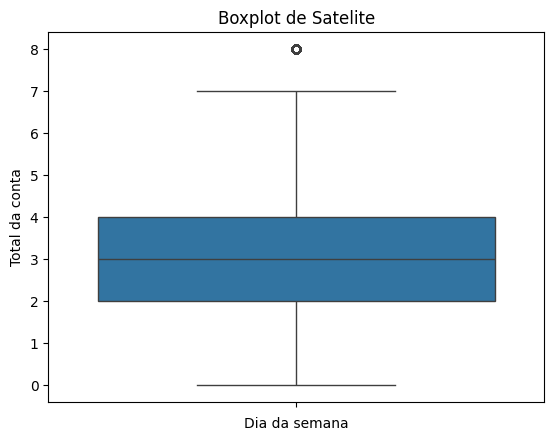

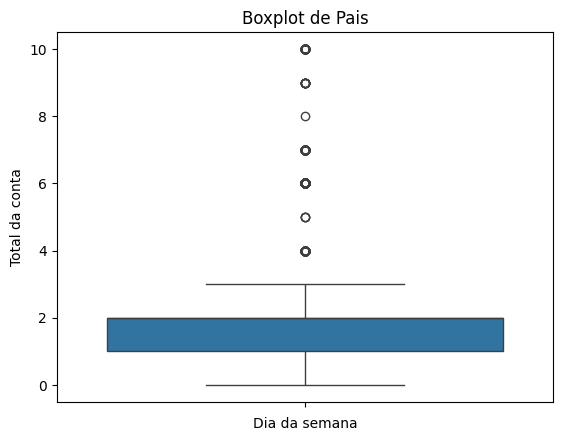

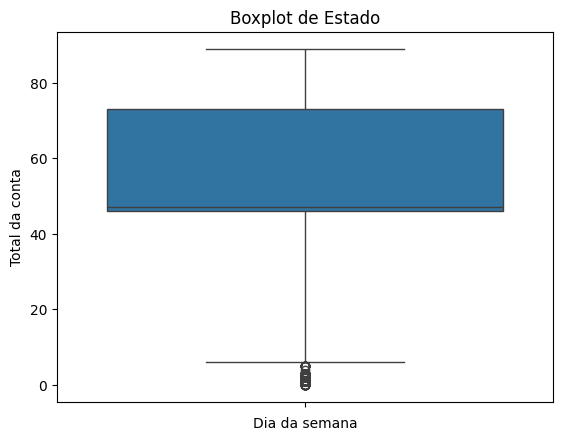

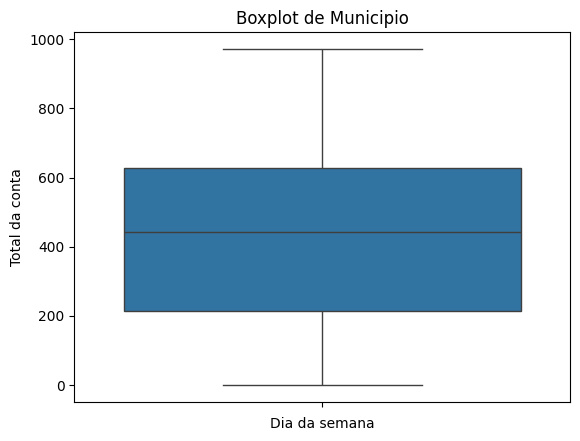

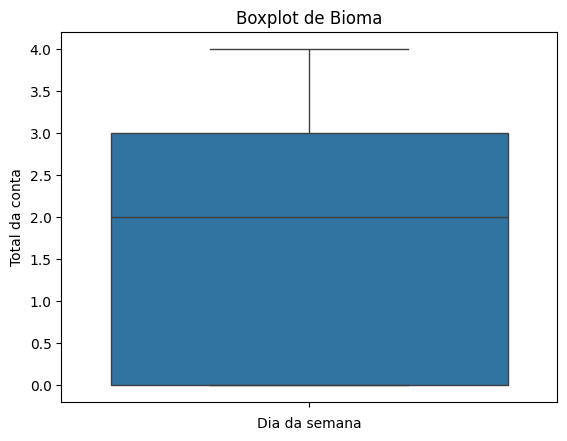

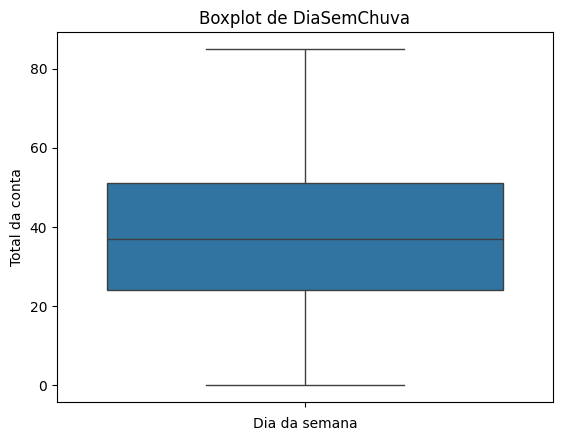

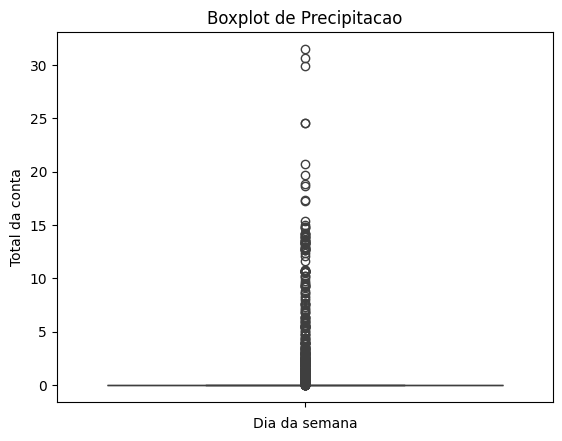

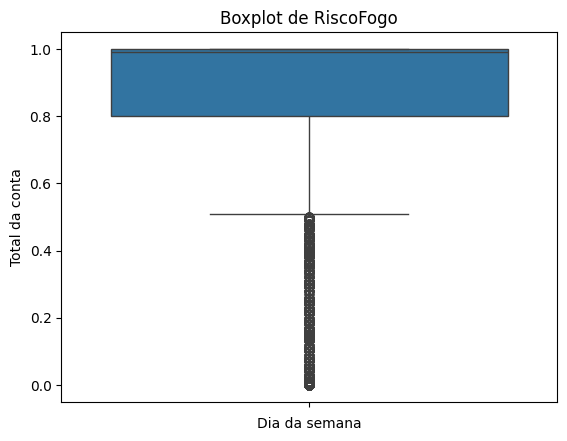

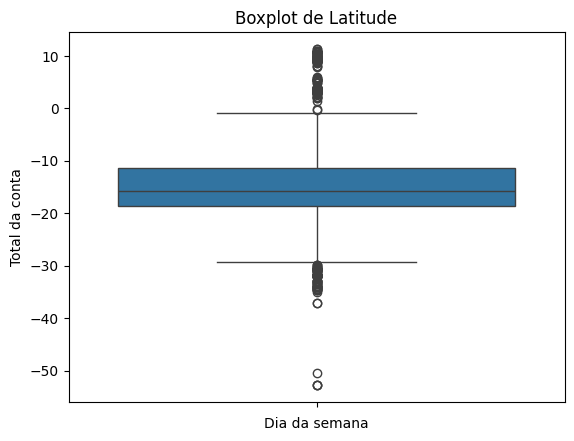

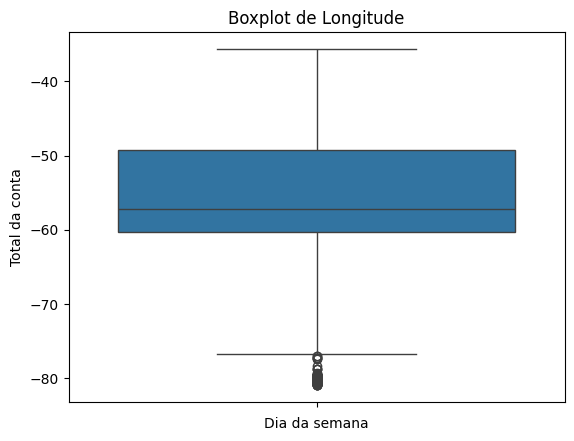

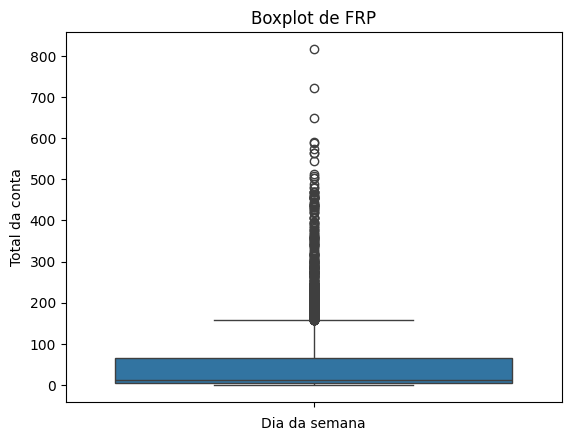

In [106]:
for coluna in colunas:
    # Criando um boxplot
    sns.boxplot(y=df[coluna])

    # Exibindo o gráfico
    plt.title(f'Boxplot de {coluna}')
    plt.xlabel('Dia da semana')
    plt.ylabel('Total da conta')
    plt.show()

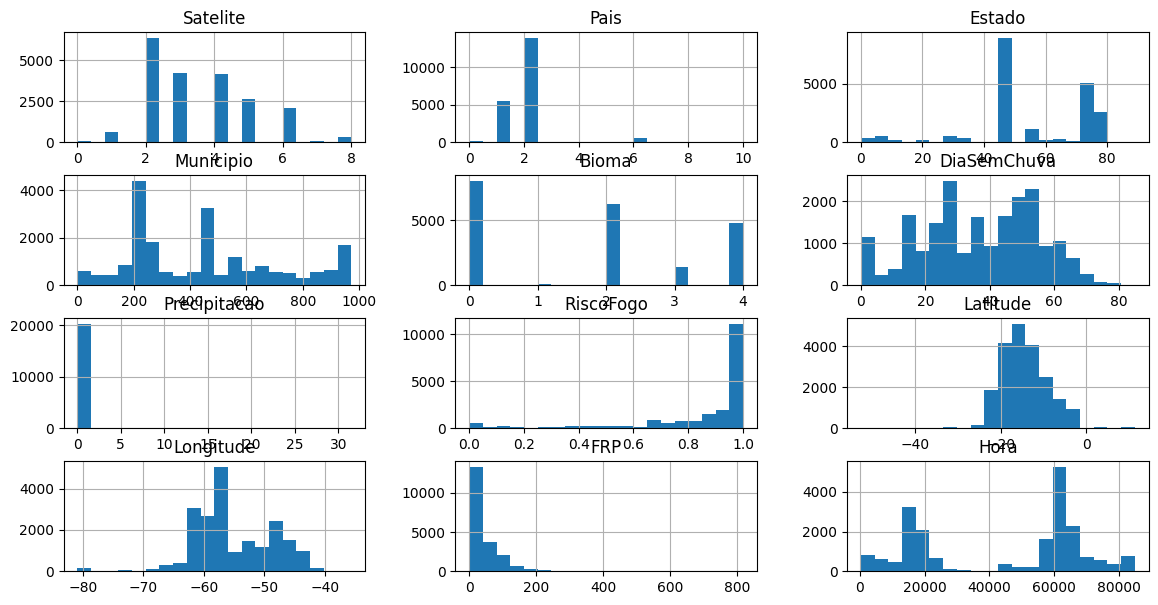

In [107]:
# Histograma
df.hist(figsize=(14, 7), bins=20)
plt.show()

<Axes: title={'center': 'Pearson Correlation of Features'}>

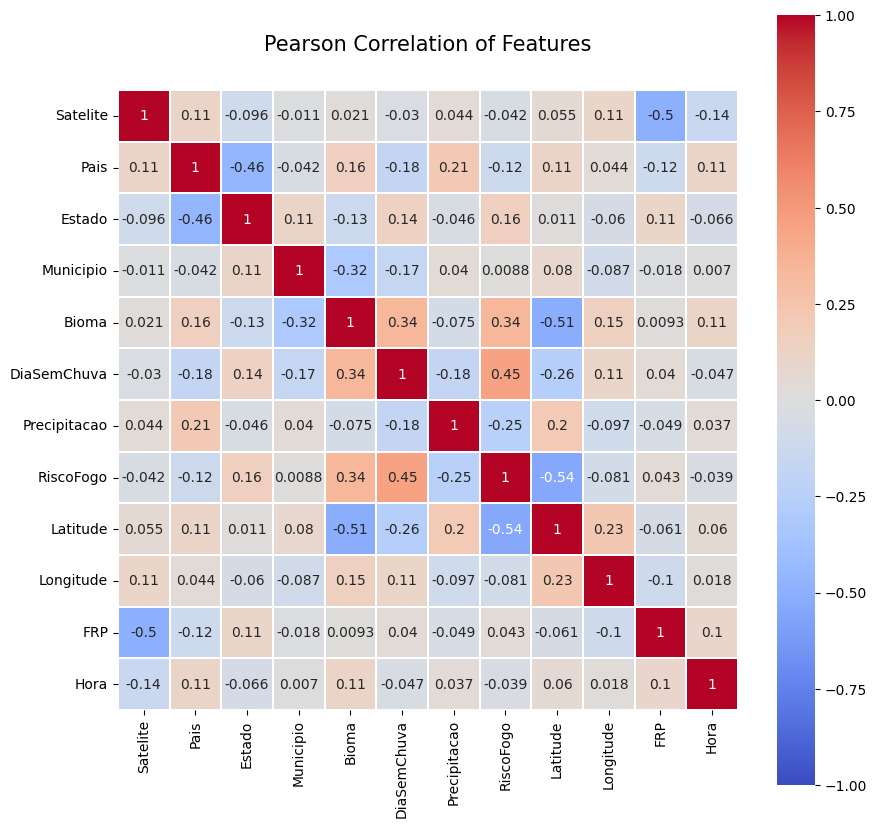

In [108]:
# Matriz de correlação para saber como as variáveis se relacionam
colormap = plt.cm.coolwarm
plt.figure(figsize=(10,10))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(df.astype(float).corr(),linewidths=0.1,vmin=-1.0,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

In [109]:
# Farei agora o drop de colunas que serão desnecessárias para o processo de aprendizado
colunas_para_dropar = ['Satelite', 'Pais', 'Municipio', 'FRP']
df.drop(columns=colunas_para_dropar, axis=1, inplace=True)

In [110]:
# Importando bibliotecas para fazer os algoritmos de Regressão
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

# Importando bibliotecas para ver as métricas
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Tratar outliers
from sklearn.ensemble import IsolationForest

In [111]:
# Separando o Dataset
X = df.drop('RiscoFogo', axis=1)
y = df['RiscoFogo']

In [130]:
# Separando o Dataset em treino, teste e validação
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=53)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=53)

In [131]:
# Normalizar os dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

In [132]:
# Função para plotar scatter plot
def plot_scatter(y_true, y_pred, model_name):
    plt.figure(figsize=(8, 6))
    plt.scatter(y_true, y_pred, alpha=0.5)
    plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], color='red', linestyle='--')
    plt.title(f"{model_name} - Scatter Plot")
    plt.xlabel("True Values")
    plt.ylabel("Predicted Values")
    plt.grid(True)
    plt.show()

In [133]:
# Função para mostrar métricas
def mostrar_metricas(model, y_test, y_pred_test, y_val, y_pred_val):
    mse = mean_squared_error(y_test, y_pred_test)
    mae = mean_absolute_error(y_test, y_pred_test)
    r2 = r2_score(y_test, y_pred_test)
    rmse = np.sqrt(mse)
    print(f"\n{model} - teste:")
    print(f"  MSE  = {mse}")
    print(f"  MAE  = {mae}")
    print(f"  R²   = {r2}")
    print(f"  RMSE = {rmse}\n")
    plot_scatter(y_test, y_pred_test, model)

    mse = mean_squared_error(y_val, y_pred_val)
    mae = mean_absolute_error(y_val, y_pred_val)
    r2 = r2_score(y_val, y_pred_val)
    rmse = np.sqrt(mse)
    print(f"\n{model} - validação:")
    print(f"  MSE  = {mse}")
    print(f"  MAE  = {mae}")
    print(f"  R²   = {r2}")
    print(f"  RMSE = {rmse}\n")
    plot_scatter(y_val, y_pred_val, model)
    print("\n")
    print("+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+")


Linear Regression - teste:
  MSE  = 0.0368608570680025
  MAE  = 0.14314958156371982
  R²   = 0.40870825448542913
  RMSE = 0.19199181510679694



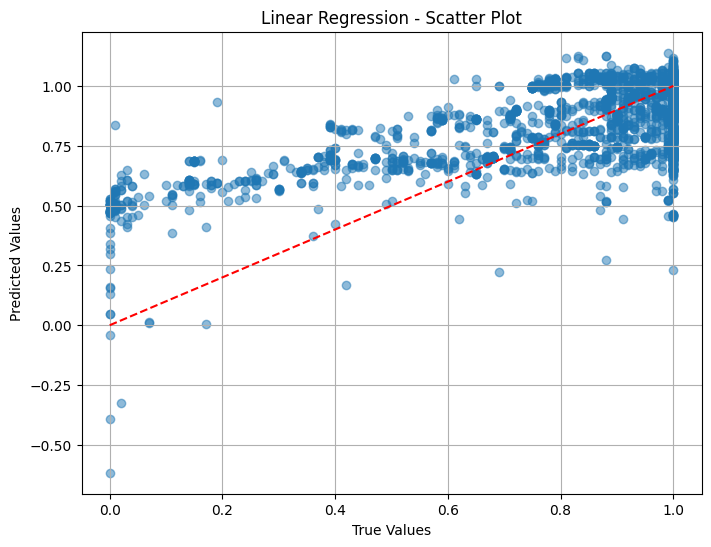


Linear Regression - validação:
  MSE  = 0.037389964180365144
  MAE  = 0.14228164157281814
  R²   = 0.43395280277579074
  RMSE = 0.19336484732330525



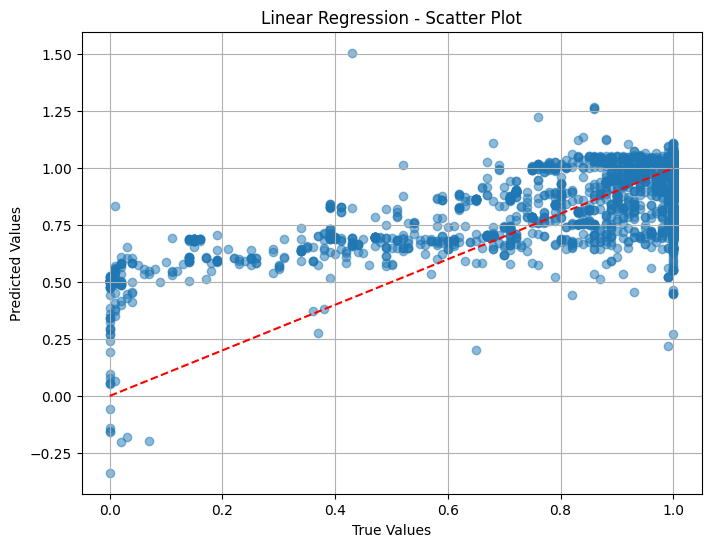



+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+

Random Forest Regressor - teste:
  MSE  = 0.0021866263453424223
  MAE  = 0.013433852645245168
  R²   = 0.964923927131146
  RMSE = 0.04676137664079643



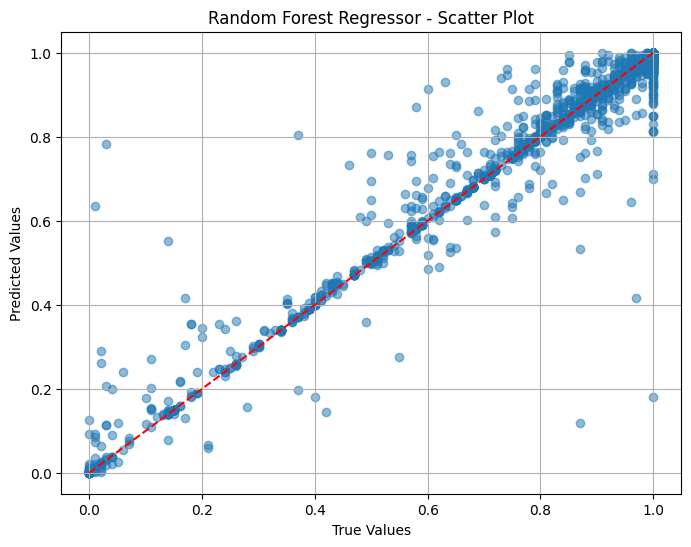


Random Forest Regressor - validação:
  MSE  = 0.0022447759604153155
  MAE  = 0.013484133679429088
  R²   = 0.9660163049458967
  RMSE = 0.047379066689998396



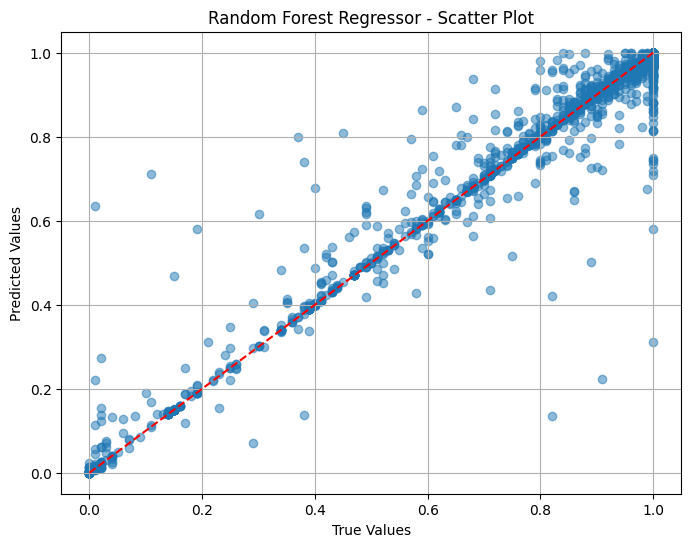



+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+

Extra Trees Regressor - teste:
  MSE  = 0.001929674313534567
  MAE  = 0.012121713729308788
  R²   = 0.9690457416380873
  RMSE = 0.043928058385666977



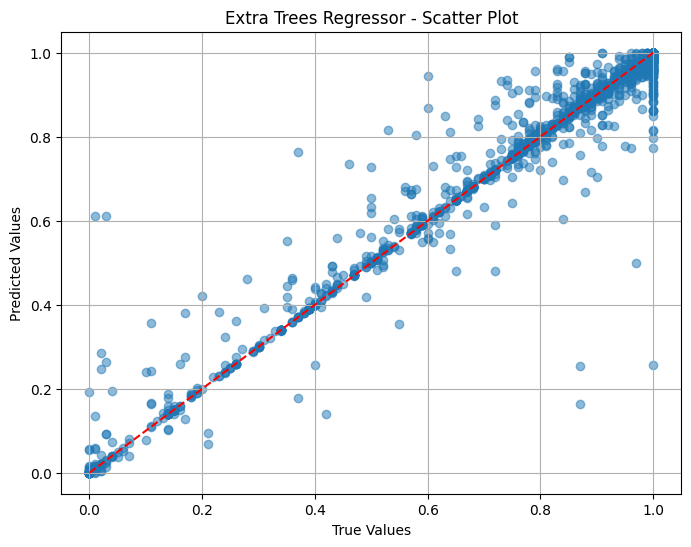


Extra Trees Regressor - validação:
  MSE  = 0.0021628859863724852
  MAE  = 0.012058306294614036
  R²   = 0.9672560384226153
  RMSE = 0.04650683806035931



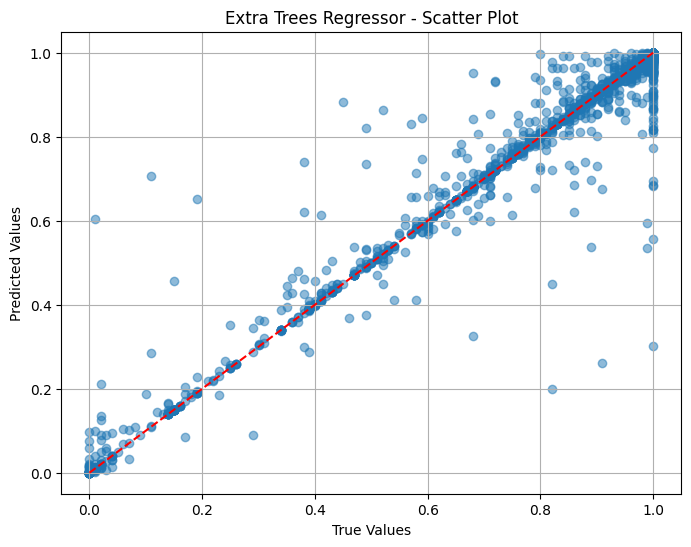



+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+

Gradient Boosting Regressor - teste:
  MSE  = 0.009407740030887778
  MAE  = 0.05942594719643031
  R²   = 0.8490887226537193
  RMSE = 0.0969935050964124



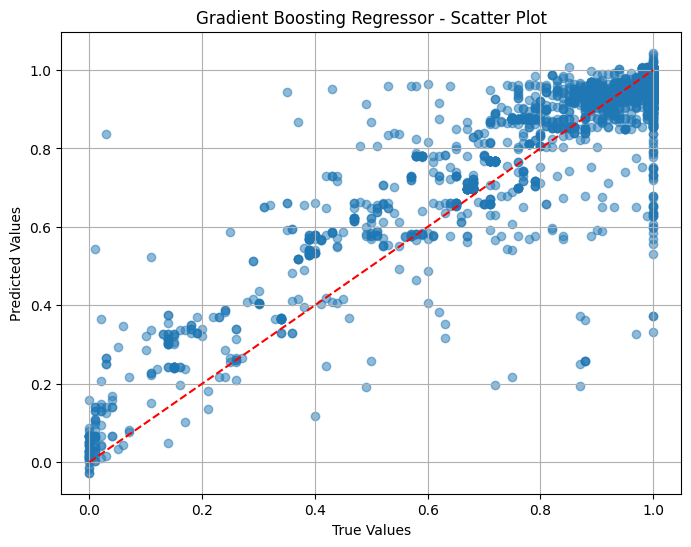


Gradient Boosting Regressor - validação:
  MSE  = 0.009774749400236897
  MAE  = 0.06026468709191251
  R²   = 0.8520199304047827
  RMSE = 0.09886733232082727



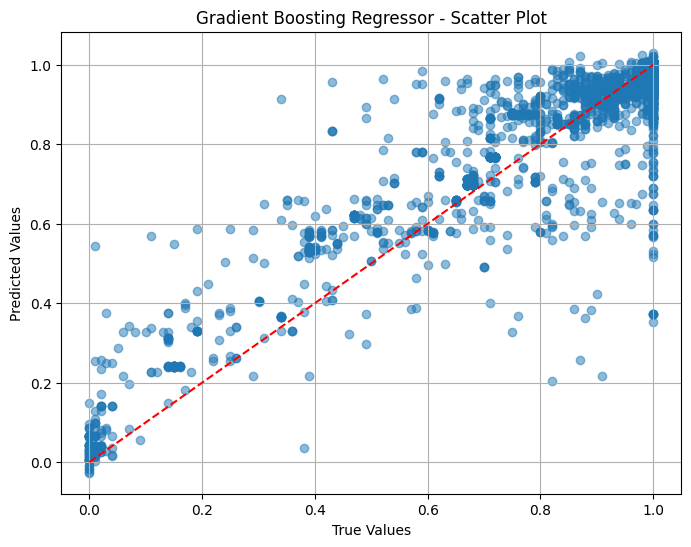



+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+

K-Nearest Neighbors Regressor - teste:
  MSE  = 0.00539906653683869
  MAE  = 0.029733852645245053
  R²   = 0.9133925868617994
  RMSE = 0.07347834059665943



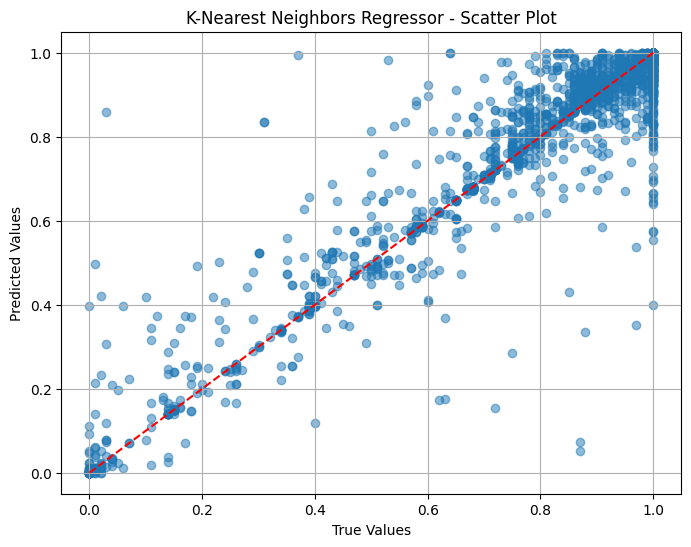


K-Nearest Neighbors Regressor - validação:
  MSE  = 0.005996272550292018
  MAE  = 0.03161583387410773
  R²   = 0.9092223449449661
  RMSE = 0.07743560260172332



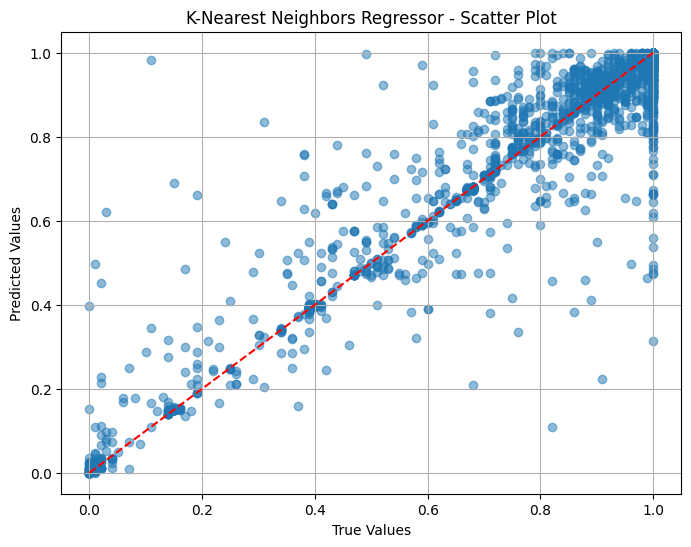



+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+

Support Vector Machine Regressor - teste:
  MSE  = 0.011588941640814775
  MAE  = 0.07705502701908545
  R²   = 0.8140996689571766
  RMSE = 0.10765194675812777



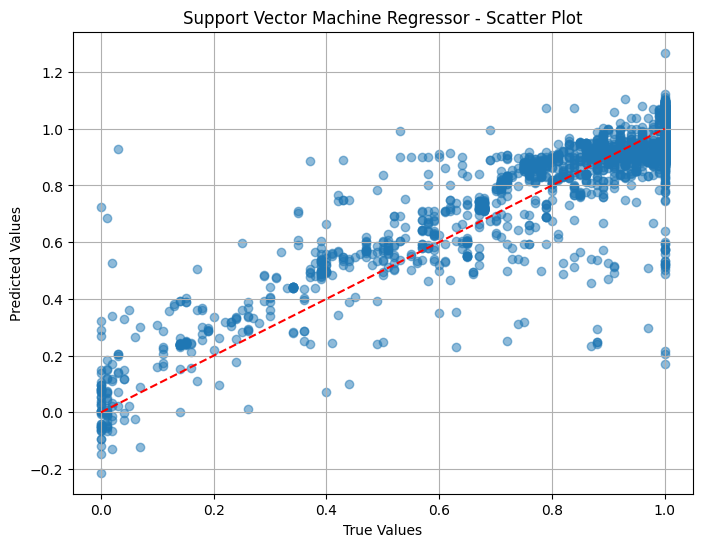


Support Vector Machine Regressor - validação:
  MSE  = 0.012368537837911526
  MAE  = 0.07812922465663168
  R²   = 0.8127525305149135
  RMSE = 0.11121392825501455



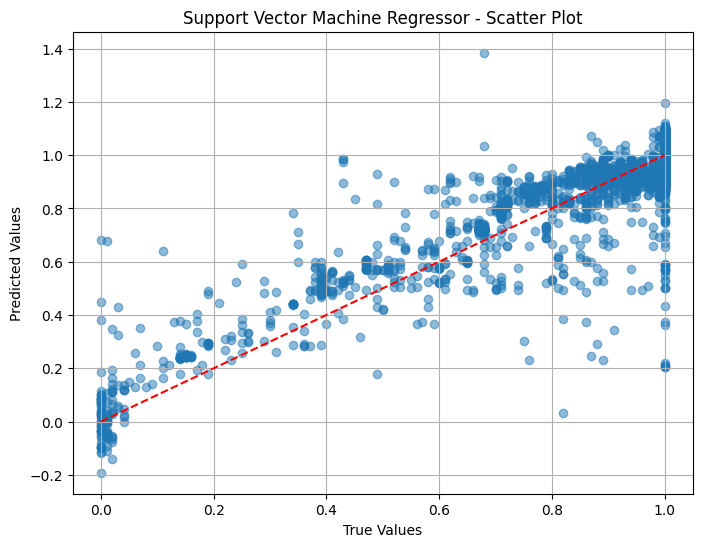



+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+


In [134]:
# Aplicando os algoritmos de Regressão para prever o valor da coluna RiscoFogo

# 1. Regressão Linear
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_test = lr.predict(X_test)
y_pred_val = lr.predict(X_val)
mostrar_metricas("Linear Regression", y_test, y_pred_test, y_val, y_pred_val)

# 2. Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_test = rf.predict(X_test)
y_pred_val = rf.predict(X_val)
mostrar_metricas("Random Forest Regressor", y_test, y_pred_test, y_val, y_pred_val)

# 3. Extra Trees Regressor
et = ExtraTreesRegressor(n_estimators=100, random_state=42)
et.fit(X_train, y_train)
y_pred_test = et.predict(X_test)
y_pred_val = et.predict(X_val)
mostrar_metricas("Extra Trees Regressor", y_test, y_pred_test, y_val, y_pred_val)

# 4. Gradient Boosting Regressor
gb = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb.fit(X_train, y_train)
y_pred_test = gb.predict(X_test)
y_pred_val = gb.predict(X_val)
mostrar_metricas("Gradient Boosting Regressor", y_test, y_pred_test, y_val, y_pred_val)

# 5. K-Nearest Neighbors Regressor
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_test = knn.predict(X_test)
y_pred_val = knn.predict(X_val)
mostrar_metricas("K-Nearest Neighbors Regressor", y_test, y_pred_test, y_val, y_pred_val)

# 6. Support Vector Machine Regressor (SVR)
svr = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
svr.fit(X_train, y_train)
y_pred_test = svr.predict(X_test)
y_pred_val = svr.predict(X_val)
mostrar_metricas("Support Vector Machine Regressor", y_test, y_pred_test, y_val, y_pred_val)

In [126]:
# O Extra Trees Regressor foi o algoritmo que funcionou melhor. Logo, vou aplicar as otimizações nele
# Baixando biblioteca scikit-optimize
%pip install scikit-optimize

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [127]:
# Importando bibliotecas para otimização
from skopt import BayesSearchCV
from skopt.space import Integer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

In [128]:
# Definir os espaços de hiperparâmetros para cada técnica
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

param_random = {
    'n_estimators': np.arange(10, 200, step=10),
    'max_depth': [None] + list(np.arange(10, 50, step=10)),
    'min_samples_split': np.arange(2, 10, step=1),
    'min_samples_leaf': np.arange(1, 10, step=1),
}

param_bayes = {
    'n_estimators': Integer(10, 200),
    'max_depth': Integer(1, 50),
    'min_samples_split': Integer(2, 10),
    'min_samples_leaf': Integer(1, 10),
}


Extra Trees - Grid Search - teste:
  MSE  = 0.0023507007551748396
  MAE  = 0.01420116828546836
  R²   = 0.9612802143152878
  RMSE = 0.04848402577318471



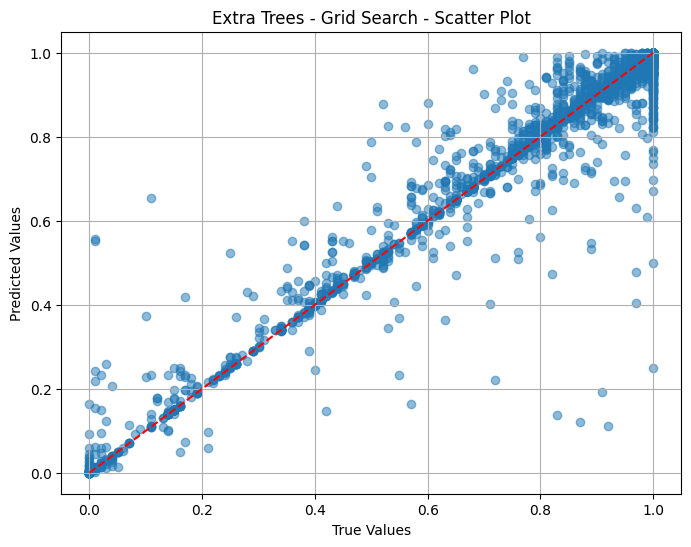


Extra Trees - Grid Search - validação:
  MSE  = 0.0023671884424797487
  MAE  = 0.014250060948038528
  R²   = 0.9630251272524022
  RMSE = 0.048653760825651995



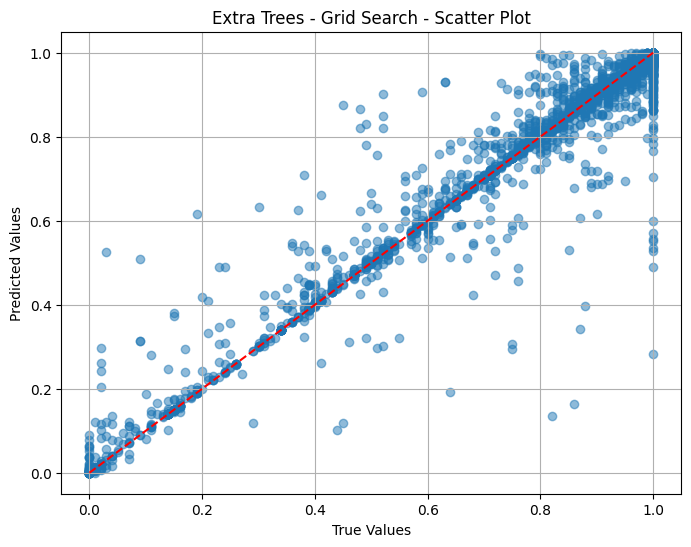



+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+

Extra Trees - Randomized Search - teste:
  MSE  = 0.002367182561842647
  MAE  = 0.014182362574134862
  R²   = 0.9610087327068909
  RMSE = 0.048653700392083714



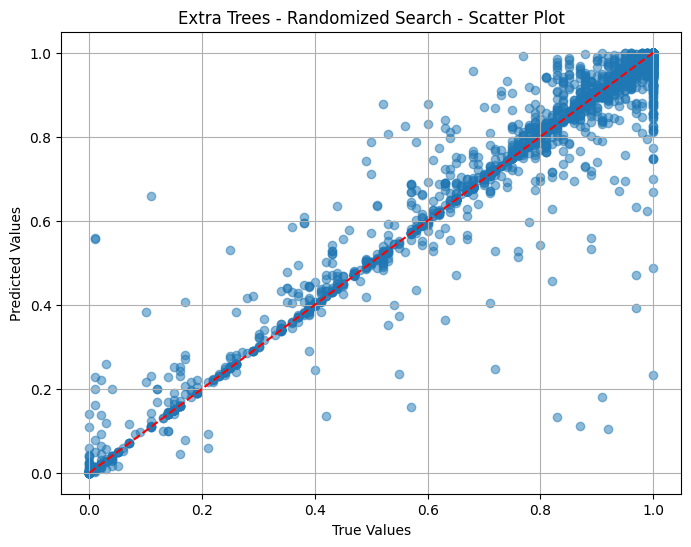


Extra Trees - Randomized Search - validação:
  MSE  = 0.002354135190238283
  MAE  = 0.014160862420938497
  R²   = 0.9632290156847337
  RMSE = 0.048519431058476795



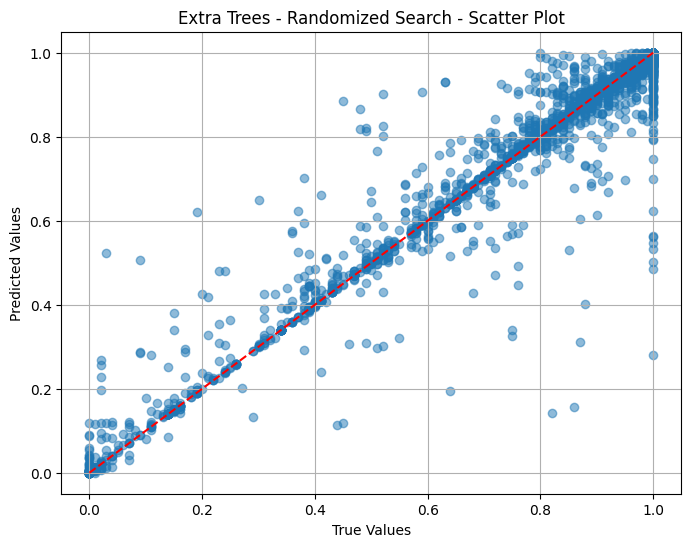



+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+

Extra Trees - Bayes Search - teste:
  MSE  = 0.0024176513762794653
  MAE  = 0.01462169959382089
  R²   = 0.9601774309452978
  RMSE = 0.04916961842723071



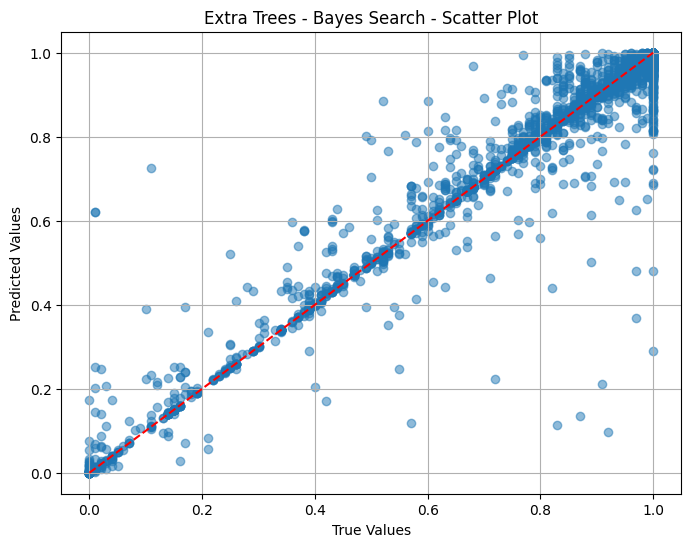


Extra Trees - Bayes Search - validação:
  MSE  = 0.002371809356864006
  MAE  = 0.014629225739705282
  R²   = 0.9629529497618952
  RMSE = 0.048701225414398



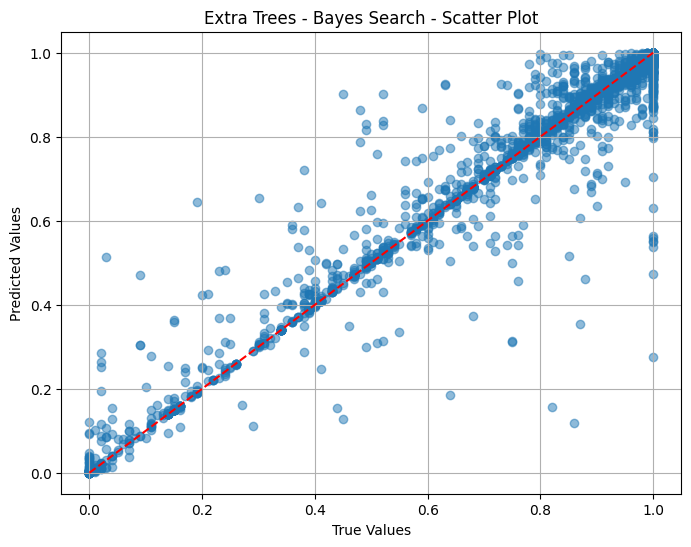



+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+


In [129]:
# GridSearchCV
grid_search = GridSearchCV(estimator=et, param_grid=param_grid, cv=5, n_jobs=-1, scoring='r2')
grid_search.fit(X_train, y_train)
y_pred_test = grid_search.predict(X_test)
y_pred_val = grid_search.predict(X_val)
mostrar_metricas("Extra Trees - Grid Search", y_test, y_pred_test, y_val, y_pred_val)

# RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=et, param_distributions=param_random, n_iter=100, cv=5, n_jobs=-1, scoring='r2', random_state=42)
random_search.fit(X_train, y_train)
y_pred_test = random_search.predict(X_test)
y_pred_val = random_search.predict(X_val)
mostrar_metricas("Extra Trees - Randomized Search", y_test, y_pred_test, y_val, y_pred_val)

# BayesSearchCV
bayes_search = BayesSearchCV(estimator=et, search_spaces=param_bayes, n_iter=100, cv=5, n_jobs=-1, scoring='r2', random_state=42)
bayes_search.fit(X_train, y_train)
y_pred_test = bayes_search.predict(X_test)
y_pred_val = bayes_search.predict(X_val)
mostrar_metricas("Extra Trees - Bayes Search", y_test, y_pred_test, y_val, y_pred_val)